In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
%matplotlib inline

In [87]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['Duration']= df['dropOff_datetime']-df['pickup_datetime']
    df['Duration']=df['Duration'].apply(lambda td: td.total_seconds()/60)
    
    df=df[(df.Duration >=0)& (df.Duration <=60)]
    
    df['PUlocationID'] = df['PUlocationID'].replace(np.nan,-1)
    df['DOlocationID'] = df['DOlocationID'].replace(np.nan,-1)
    
    categorical=['PUlocationID','DOlocationID']
    df[categorical].astype(str)
    
    return df    

In [88]:
df_train=read_dataframe('fhv_tripdata_2021-01.parquet')
df_val=read_dataframe('fhv_tripdata_2021-02.parquet')

In [89]:
categorical=['PUlocationID','DOlocationID']

dv=DictVectorizer()
train_dict=df_train[categorical].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

val_dict=df_val[categorical].to_dict(orient='records')
X_val=dv.fit_transform(val_dict)

In [90]:
target='Duration'
Y_train=df_train[target].values
Y_val=df_val[target].values

In [91]:
model = LinearRegression() 
model.fit(X_train, Y_train)

y_pred = model.predict(X_train)
y_val_pred=model.predict(X_val)

RMSE_train = mean_squared_error(Y_train, y_pred, squared=False)
print(RMSE_train)
RMSE_val = mean_squared_error(Y_val, y_val_pred, squared=False)
print(RMSE_val)

11.498985508086957
11.932726829042458


# Following is practice code

In [41]:
dfJan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037


In [42]:
dfJan.shape

(1154112, 7)

In [43]:
dfJan.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                          float64
Affiliated_base_number            object
dtype: object

In [64]:
dfJan['Duration']= dfJan['dropOff_datetime']-dfJan['pickup_datetime']
dfJan['Duration']=dfJan['Duration'].apply(lambda td: td.total_seconds()/60)
dfJan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037,15.216667


In [45]:
average= dfJan['Duration'].mean()
print(average)

19.1672240937939


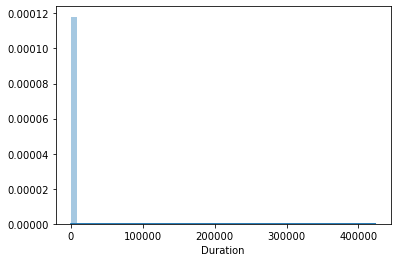

In [46]:
sns.distplot(dfJan["Duration"])

In [47]:
dfJan['Duration'].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: Duration, dtype: float64

In [48]:
dfJan.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
Duration                        0
dtype: int64

In [49]:
958267/1154112

0.8303067639882438

In [65]:
dfJan=dfJan[(dfJan.Duration >=1)& (dfJan.Duration <=60)]

In [66]:
dfJan['PUlocationID'] = dfJan['PUlocationID'].replace(np.nan,-1)
dfJan['DOlocationID'] = dfJan['DOlocationID'].replace(np.nan,-1)
dfJan

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,NaN,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,NaN,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,NaN,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,NaN,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,NaN,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,NaN,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,NaN,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,NaN,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,NaN,B03285,19.433333


In [67]:
categorical=['PUlocationID','DOlocationID']

In [52]:
dfJan[categorical].astype(str).dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [68]:
train_dict=dfJan[categorical].to_dict(orient='records')

In [69]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dict)
X_train

<1109826x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [70]:
target='Duration'
Y_train=dfJan[target].values

In [71]:
model = LinearRegression() 
model.fit(X_train, Y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_train)

In [73]:
RMSE = mean_squared_error(Y_train, y_pred, squared=False)
print(RMSE)

11.415432830521663


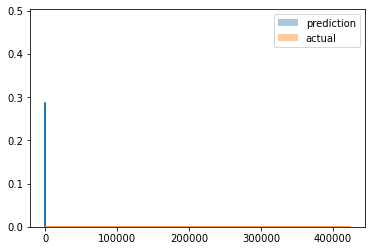

In [59]:
sns.distplot(y_pred, label='prediction')
sns.distplot(Y_train, label='actual')
plt.legend()